# UK ROAD ACCIDENTS DATA ANALYTICS
<hr>
<h4> Student:  John Marc De Villa </h4>
<h4> Year&Section: BSIT- 3A </h4>

<hr>

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [33]:
accident = pd.read_csv('/content/uk_road_accident.csv')

In [34]:
accident['Accident Date'] = accident['Accident Date'].astype(str)
accident['Accident Date'] = accident['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
accident['Accident Date'] = accident['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce')

accident.dtypes
accident.isnull().sum()

accident['Accident Year'] = accident['Accident Date'].dt.year
accident['Accident Month'] =  accident['Accident Date'].dt.month_name()
accident['Accident Day'] =  accident['Accident Date'].dt.day
accident['Accident DayOfWeek'] =  accident['Accident Date'].dt.dayofweek
accident.isnull().sum()

,0
Index,0
Accident_Severity,0
Accident Date,0
Latitude,25
Light_Conditions,0
District Area,0
Longitude,26
Number_of_Casualties,0
Number_of_Vehicles,0
Road_Surface_Conditions,726


In [35]:

accident['Accident Year'] = accident['Accident Year'].astype('category')

In [36]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  object        
 10  Road_Type                656159 non-null  object        
 11  Urban_or_Rural_Area      660664 non-null  object        
 12  Weather_Conditio

In [37]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('Unknown')

accident.isnull().sum()

,0
Index,0
Accident_Severity,0
Accident Date,0
Latitude,0
Light_Conditions,0
District Area,0
Longitude,0
Number_of_Casualties,0
Number_of_Vehicles,0
Road_Surface_Conditions,0


<ol>
    <h3><li>What is the most common accident severity recorded?</li></h3>
</ol>

In [38]:
accident['Accident_Severity'].mode()

,Accident_Severity
0,Slight


## Insight 💡
<ol>
    <em><li>Based on the given dataset, the most common accident severity recorded is <b>Slight.</b> </em>
    </li>
</ol>
<hr>

### 2. What is the proportion of accidents in urban versus rural areas?

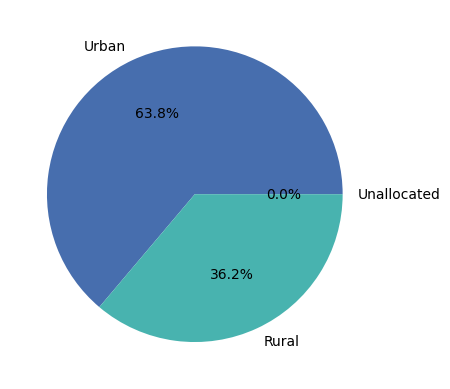

In [39]:
area_counts = accident['Urban_or_Rural_Area'].value_counts()

plt.pie(area_counts,
        labels=area_counts.index,
        autopct='%1.1f%%',
        colors=['#476EAE', '#48B3AF'])

plt.show()

## Insight 💡

<ol start="2">
    <<li> <em> About <b>421,678 accidents (63.8%) </b>occurred in urban areas compared to<b> 239,001 accidents (36.2%) </b>in rural areas, indicating that accidents are more concentrated in cities than in rural locations.</em>
    </li>
</ol>
<hr>


<ol start="3">
    <h3><li> Which vehicle types were most frequently involved in accidents in Urban areas?</h3>
    </li>
</ol>

In [40]:
Area_1 = accident.groupby(['Urban_or_Rural_Area','Vehicle_Type']).size().unstack(level=0)
Area_1

Urban_or_Rural_Area,Rural,Unallocated,Urban
Vehicle_Type,,,
Agricultural vehicle,675.0,NaN,1272.0
Bus or coach (17 or more pass seats),9025.0,2.0,16851.0
Car,181922.0,8.0,316062.0
Data missing or out of range,NaN,NaN,6.0
Goods 7.5 tonnes mgw and over,6156.0,NaN,11151.0
Goods over 3.5t. and under 7.5t,2232.0,NaN,3864.0
Minibus (8 - 16 passenger seats),718.0,NaN,1258.0
Motorcycle 125cc and under,5023.0,NaN,10246.0
Motorcycle 50cc and under,2710.0,NaN,4893.0


## Insight 💡

<ol start = 3>
    <li><em>The most frequently involved type of vehicle in urban accidents is <b>the car, with 316,062</b> recorded cases.</em>
    </li>
    <li><em>Very few accidents involve <b>Ridden horses (1 rural, 3 urban) or Pedal cycles (70 rural, 127 urban) </b>compared to motor vehicles, highlighting that non-motorized transport contributes minimally to recorded accidents.</em>
    </li>
    <li><em>Very few accidents involve <b>Ridden horses (1 rural, 3 urban) or Pedal cycles (70 rural, 127 urban) </b>compared to motor vehicles, highlighting that non-motorized transport contributes minimally to recorded accidents.</em>
    </li>
</ul>
<br>    
<hr>


<ol start="4">
    <h3><li> What is total number of accidents were slight, serious, and fatal?</h3>
    </li>
</ol>

In [41]:
Ac_Sev = accident.groupby(['Accident_Severity']).size()
Ac_Sev

,0
Accident_Severity,
Fatal,8661
Serious,88217
Slight,563801


## Insight 💡

<ol start="6">
    <li><em>The majority of accidents are <b>Slight (563,801 cases)</b>, showing that most incidents result in minor damage or injury.</em>
    </li>
    <li><em>Serious accidents account for <b>88,217 cases</b>, which is still significant and highlights notable road safety concerns.</em>
    </li>
    <li><em>Fatal accidents are the <b>least common at 8,661 cases</b>, indicating that while deaths are rare compared to slight accidents, they still represent a critical safety issue.</em>
</li>
</ol>
<hr>


<ol start="5">
    <h3><li> Under which light conditions (daylight, darkness, streetlights) do most accidents occur in urban areas?</h3>
    </li>
</ol>

In [42]:
accident[accident['Urban_or_Rural_Area'] == 'Urban']['Light_Conditions'].value_counts()

,count
Light_Conditions,
Daylight,309521
Darkness - lights lit,104638
Darkness - lighting unknown,4017
Darkness - no lighting,1920
Darkness - lights unlit,1582


## Insight 💡

<ul>
    <li><em>Based on the dataset, in Urban Areas, </em>
    </li>
</ul>
<ol start = 9>
    <li><em>Most accidents happen in <b>daylight (309,521 cases)</b> because more vehicles and people are on the road during the day.</em></li>
    <li><em>The second highest is in <b>darkness with streetlights (104,638 cases)</b>, showing that even with lights, accidents are still common at night.</em></li>
    <ul>
        <br>
        <li><em>This means that in urban areas, accidents mostly occur in well-lit conditions (daytime or streetlights), not just in dark places.</em></li>
    </ul>
    
</ol>
<hr>


<ol start="6">
    <h3><li> What is the correlation between the number of vehicles involved and the number of casualties?</h3>
    </li>
</ol>

In [43]:
accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

np.float64(0.22888886126927635)

## Insight 💡

<ol start = 11>
    <li><em>There is <b>no strong correlation (0.22888886126927627)</b> between the number of vehicles involved and the number of casualties..</em></li>
    
</ol>
<hr>


<ol start="7">
    <h3><li> What was the least common weather condition during accidents in the month of March?</h3>
    </li>
</ol>

In [44]:
accident.groupby(['Weather_Conditions','Accident Month']).size().unstack()

Accident Month,April,August,December,February,January,July,June,March,May,November,October,September
Weather_Conditions,,,,,,,,,,,,
Fine + high winds,276.0,298.0,626.0,694.0,1816.0,315.0,225.0,1448.0,463.0,1388.0,579.0,426.0
Fine no high winds,45844.0,44213.0,35545.0,37671.0,35474.0,46515.0,48292.0,43662.0,47586.0,40793.0,47822.0,47468.0
Fog or mist,140.0,52.0,903.0,615.0,434.0,36.0,102.0,209.0,54.0,577.0,278.0,128.0
Other,553.0,664.0,4113.0,1996.0,2948.0,713.0,553.0,952.0,634.0,2173.0,1188.0,663.0
Raining + high winds,118.0,390.0,944.0,501.0,1990.0,429.0,292.0,1055.0,449.0,2217.0,710.0,520.0
Raining no high winds,3596.0,7245.0,6309.0,4964.0,7307.0,8247.0,5828.0,5218.0,6003.0,11197.0,7615.0,6167.0
Snowing + high winds,23.0,2.0,212.0,216.0,188.0,1.0,NaN,162.0,3.0,65.0,11.0,2.0
Snowing no high winds,168.0,11.0,1902.0,1746.0,1435.0,15.0,16.0,288.0,14.0,563.0,67.0,13.0
Unknown,1026.0,1038.0,1282.0,1088.0,1280.0,1174.0,1173.0,1092.0,1146.0,1451.0,1310.0,1068.0


## Insight 💡

<ol start = 12>
    <li><h4><em>Most Accidents Happen in Good Weather</b></em></h4></li>
    <ul>
        <li>Most accidents happen when the weather is <b>clear and calm</b>. This shows that <b>good weather doesn't always mean safer driving</b> people might drive faster or pay less attention.</li>
    </ul>
    <li><h4><em>November Has the Most Accidents</em></h4>
    </li>
    <ul>
        <li>The month of <b>November</b> has the <b>highest number of accidents</b>, especially in clear and rainy weather. This could be due to <b>bad lighting, wet roads, or more travel</b>.
</li>
    </ul>
    <li><h4><em>Rainy Weather Increases Accidents</em></h4>
    </li>
    <ul>
        <li><b>Rainy days</b> (even without strong winds) lead to <b>many accidents</b>, especially in <b>July, August, and November</b>. Wet roads make it harder to stop or control vehicles.
</li>
    </ul>
    </ul>
    <li><h4><em>Snowy Weather Accidents Happen in Winter</em></h4>
    </li>
    <ul>
        <li>Most accidents in <b>snowy conditions</b> happen in <b>December, January, and February</b>. Snow and ice make roads slippery and dangerous.
</li>
    </ul>
    <li><h4><em>Many Accidents Have Unknown Weather</em></h4>
    </li>
    <ul>
        <li>Every month, over <b>1,000 accidents</b> were listed with <b>"unknown" weather conditions</b>. This shows that <b>some weather data may be missing or unclear.</b>
</li>
    </ul>
    
</ol>
<hr>


<ol start="8">
    <h3><li> On what month was the highest number of accidents recorded in Rural areas?</h3>
    </li>
</ol>

In [45]:
accident.groupby(['Urban_or_Rural_Area','Accident Month']).size().unstack(level=0)

Urban_or_Rural_Area,Rural,Unallocated,Urban
Accident Month,,,
April,18432.0,1.0,33311.0
August,20998.0,NaN,32915.0
December,19361.0,3.0,32472.0
February,18140.0,NaN,31351.0
January,19540.0,1.0,33331.0
July,21215.0,1.0,36229.0
June,20200.0,2.0,36279.0
March,18806.0,1.0,35279.0
May,20125.0,2.0,36225.0


## Insight 💡

<ol start = 17>
    <li><em>The highest number of rural accidents happened in <b>November (21,352 cases).</b></em></li>
    <li><em>The lowest number of rural accidents was in <b>February (18,140 cases).</b></em></li>
    
</ol>
<hr>


<ol start="9">
    <h3><li> By what percentage did accidents change from 2019 to 2022?</h3>
    </li>
</ol>

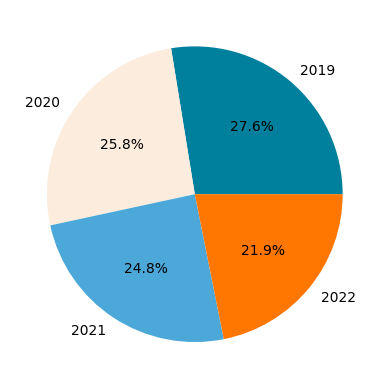

In [46]:
year_counts = accident['Accident Year'].value_counts()

plt.pie(year_counts,
        labels=year_counts.index,
        autopct='%1.1f%%',
        colors=['#00809D','#FCECDD','#4DA8DA','#FF7601'])

plt.show()

## Insight 💡

<ol start = 22>
    <li><em><b>Accidents decreased by approximately 20.7% from 2019 to 2022</b>, dropping from 27.6% of total accidents in 2019 to 21.9% in 2022.</b></em></li>
    <li><em><b>The highest percentage of accidents occurred in 2019</b>, making it the most accident-prone year in the dataset.</b></em></li>
    <li><em><b>There was a consistent decline in the percentage of accidents each year from 2019 to 2022</b>, suggesting a possible improvement in safety measures or reduced activity over time.</b></em></li>
   
    
</ol>
<hr>


<ol start="10">
    <h3><li> Which district, in urban areas, reported the highest number of accidents?</h3>
    </li>
</ol>

In [47]:
urban = accident['Urban_or_Rural_Area'] == 'Urban'
rural = accident['Urban_or_Rural_Area'] == 'Rural'

In [48]:
accident[urban]['District Area'].value_counts()

,count
District Area,
Birmingham,13357
Leeds,7124
Manchester,6577
Westminster,5706
Liverpool,5539
...,...
South Northamptonshire,39
Berwick-upon-Tweed,38
Kennet,38


## Insight 💡

<ol start = 25>
    <li><em>Based on the dataset, in urban areas, the highest number of accidents reported in district Area is <b>Birmingham (13491).</b></em></li>
</ol>
<hr>

In [49]:
for i in accident['District Area'].unique():
  print (i)

Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)
Hillingdon
Waltham Forest
Redbridge
Barking and Dagenham
Bromley
Havering
Croydon
Lambeth
Wandsworth
Sutton
Bexley
Lewisham
Harrow
Kingston upon Thames
Barrow-in-Furness
South Lakeland
Carlisle
Eden
Allerdale
Copeland
Fylde
Blackpool
Wyre
Lancaster
Chorley
West Lancashire
South Ribble
Preston
Blackburn with Darwen
Hyndburn
Ribble Valley
Burnley
Pendle
Rossendale
Wirral
Liverpool
Sefton
Knowsley
St. Helens
Manchester
Salford
Tameside
Stockport
Bolton
Wigan
Trafford
Bury
Rochdale
Oldham
Chester
Vale Royal
Halton
Warrington
Crewe and ntwich
Ellesmere Port and Neston
Congleton
Macclesfield
Crewe and Nantwich
Blyth Valley
Sunderland
Gateshead
North Tyneside
Tynedale
Berwick-upon-Tweed
Newcastle upon Tyne
Castle Morpeth
South Tyneside
Wansbeck
Alnwick
Wear 

<h1>Hounslow Analysis</h1>
<hr>
<br>
<img src='https://cdn.rt.emap.com/wp-content/uploads/sites/4/2024/05/21102446/Hounslow-Image-by-Arnonnath_Foto-Shutterstock-scaled.jpg'>

In [50]:
Hs_accident = accident[accident['District Area'] == 'Hounslow']

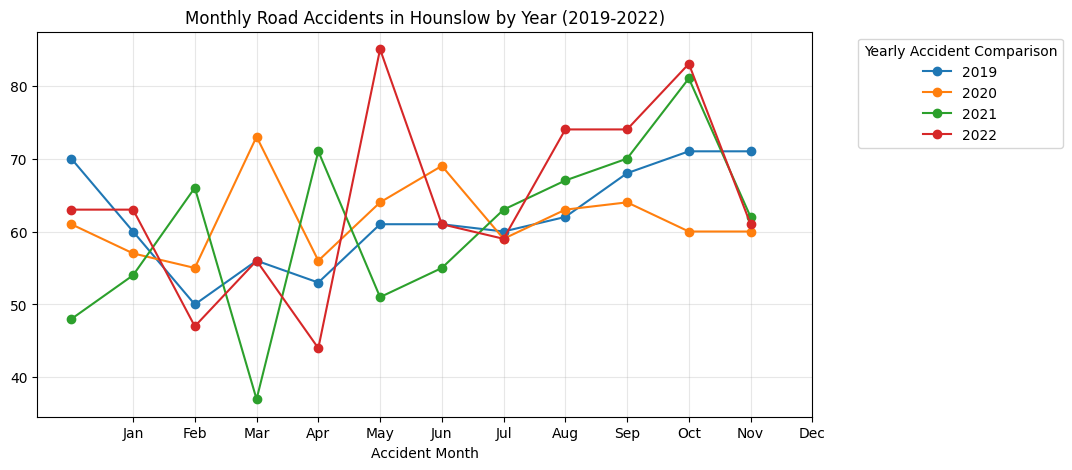

In [51]:
monthly_Hs_data = Hs_accident.groupby(['Accident Year', 'Accident Month']).size()

monthly_Hs_data = monthly_Hs_data.unstack(level=0)

monthly_Hs_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Hounslow by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

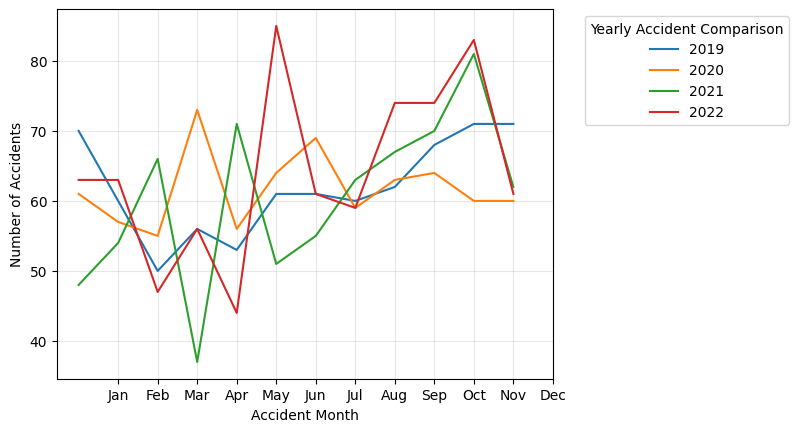

In [52]:
Hs_accident = Hs_accident.groupby(['Accident Year', 'Accident Month']).size().reset_index(name = 'Number of Accidents')
Hs_accident

sns.lineplot(data=Hs_accident, x = 'Accident Month', y = 'Number of Accidents',hue='Accident Year')

plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


In [53]:
Year_2022 = accident[accident['Accident Year'] == 2022]
Hs_accident_2022 = Year_2022[accident['District Area'] == 'Hounslow']


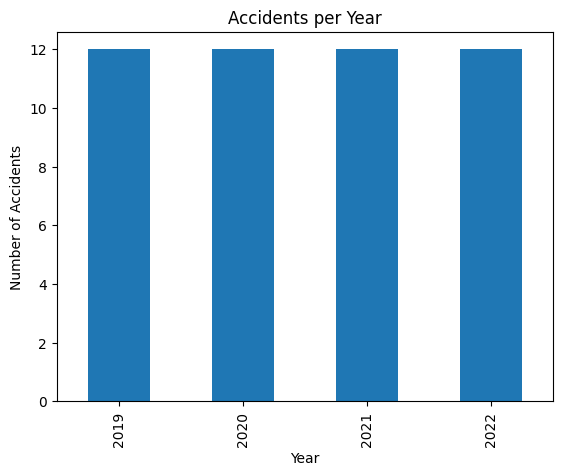

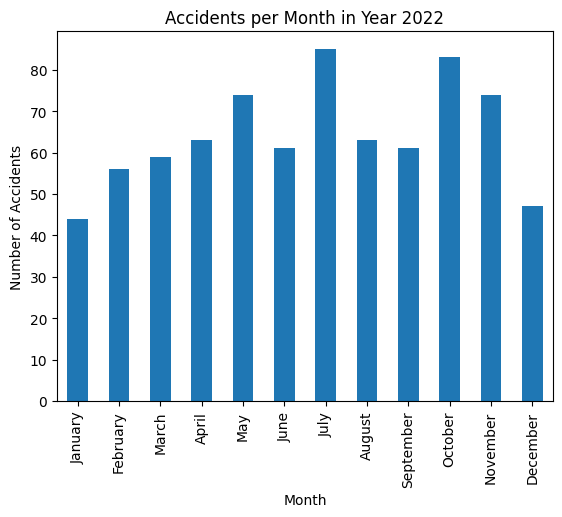

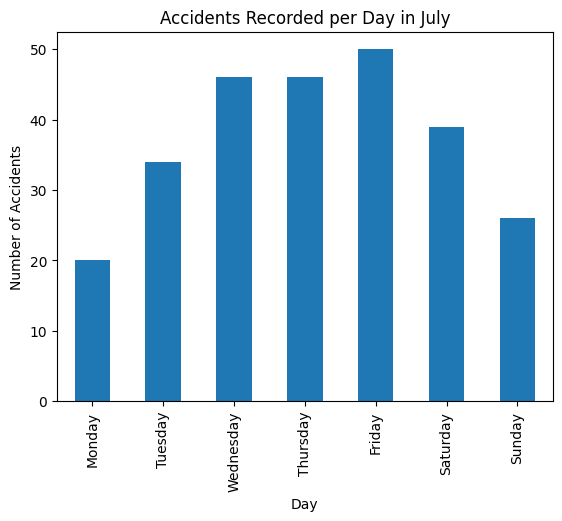

In [54]:
accidents_per_year = Hs_accident['Accident Year'].value_counts().sort_index()


#Accident per Year
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

print()
#----------------------------------------------------------------------------
Year_2022 = accident[accident['Accident Year'] == 2022]
Hs_accident_2022 = Year_2022[accident['District Area'] == 'Hounslow']

#Accident per Month
accidents_per_month = Hs_accident_2022['Accident Month'].value_counts()



month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

accidents_per_month = accidents_per_month.reindex(month_order)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month in Year 2022')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

print()

#----------------------------------------------------------------------------
July = accident[accident['Accident Month'] == 'July']
Hs_accident_July = July[accident['District Area'] == 'Hounslow']

accidents_per_day = Hs_accident_July['Accident DayOfWeek'].value_counts().sort_index()
#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents Recorded per Day in July')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

print()


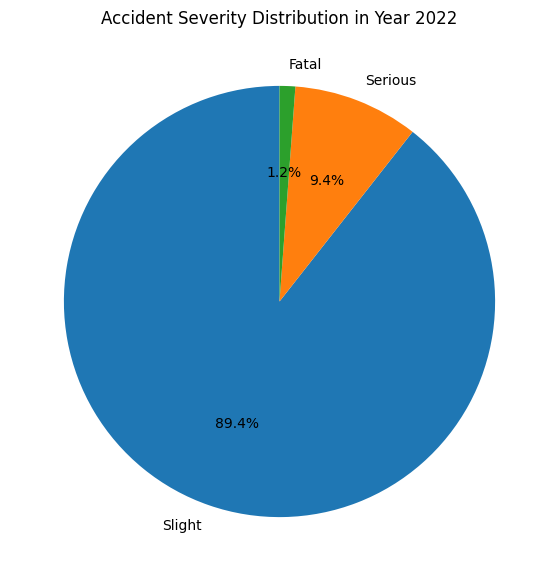

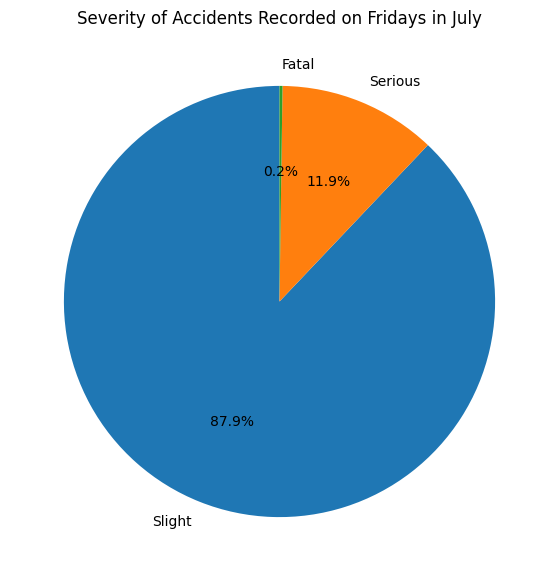

In [55]:
severity_2022_Hounslow = Hs_accident_July[Hs_accident_July['Accident Year'] == 2022]

# severity_2022
lsc_2022 = severity_2022_Hounslow['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution in Year 2022')
plt.show()

print()
#----------------------------------------------------------------------
friday = accident[accident['Accident DayOfWeek'] == 4]
Hs_friday = friday[accident['District Area'] == 'Hounslow']

severity_Hounslow  = Hs_friday['Accident_Severity'].value_counts()

plt.pie(severity_Hounslow ,
        labels = severity_Hounslow .index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Severity of Accidents Recorded on Fridays in July')
plt.show()




In [56]:
import folium
from folium.plugins import HeatMap

Hs_location = list(zip(Hs_friday['Latitude'],Hs_friday['Longitude']))

Hs_map = folium.Map(location = [Hs_friday['Latitude'].mean(),Hs_friday['Longitude'].mean()],zoom_start=13)
HeatMap(Hs_location).add_to(Hs_map)
Hs_map

## Insight 💡

<ol start = 26>
    <li>Based on the dataset, In Hounslow District, the <b>year 2022 recorded</b> the highest number of road accidents compared to 2019–2021.
    <ul>
    <li>July had the highest accidents, followed by October, while January and December had the lowest. </li>
    <li>Fridays had the most recorded accidents, making them the riskiest day, while Mondays and Sundays had the fewest.</li>
    <ul><li>Severity of Friday Accidents in July:</li>
    <ul><li>Fatal: 0.2%</li>
    <li>Serious: 11.9%</li>
    <li>Slight: 87.9%</li>
    </li></ol>

<p>In general, Accidents were more frequent in the middle and end of the week, especially towards Fridays, with most cases being slight accidents.</p>



<h1>Hackney Analysis</h1>
<hr>
<br>
<img src='https://mediaassets.cbre.com/uk-resi/-/media/project/cbre/residential/united-kingdom-resi/home/area-guides/hackney.jpg'>

In [57]:
Hackney_Ac= accident[accident['District Area'] == 'Hackney']

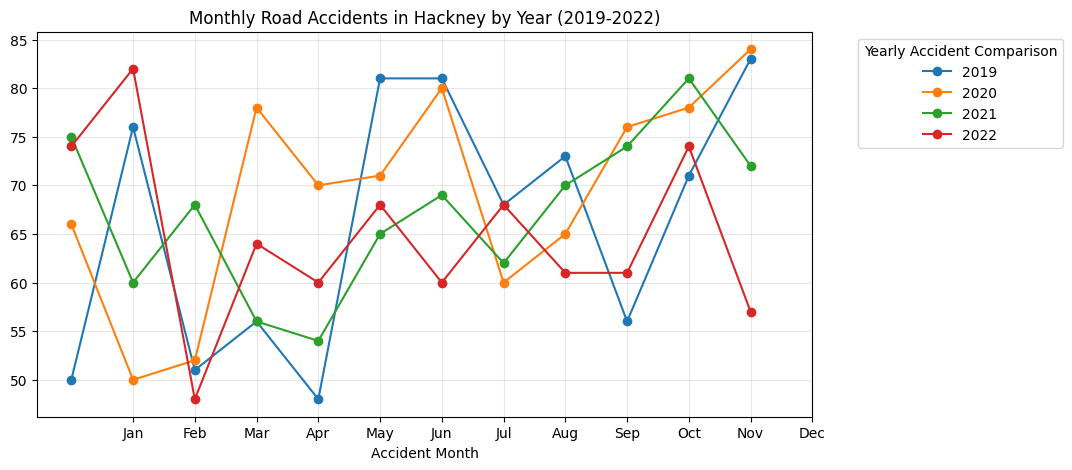

In [58]:
monthly_hackney_data = Hackney_Ac.groupby(['Accident Year', 'Accident Month']).size()

monthly_hackney_data = monthly_hackney_data.unstack(level=0)

monthly_hackney_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Hackney by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

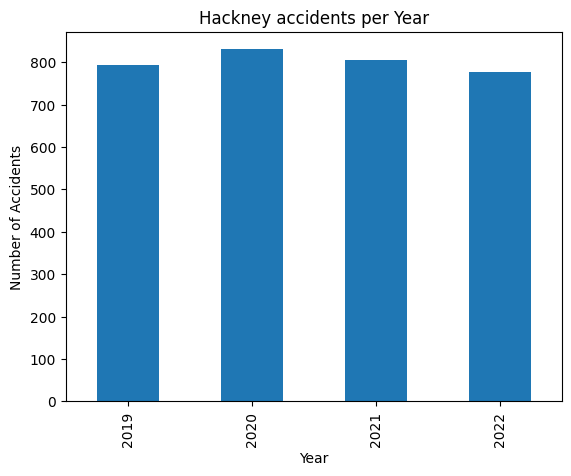

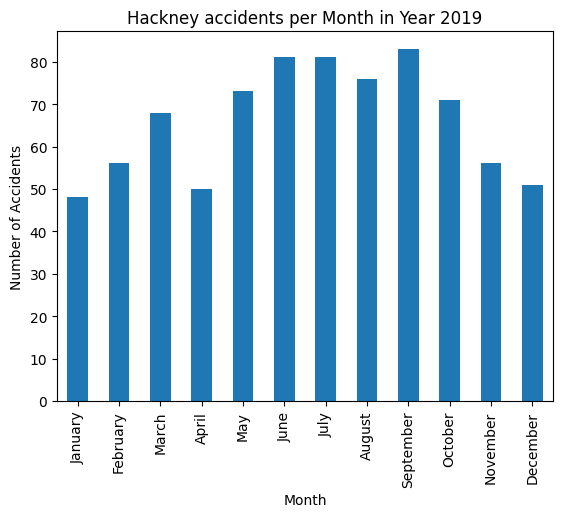

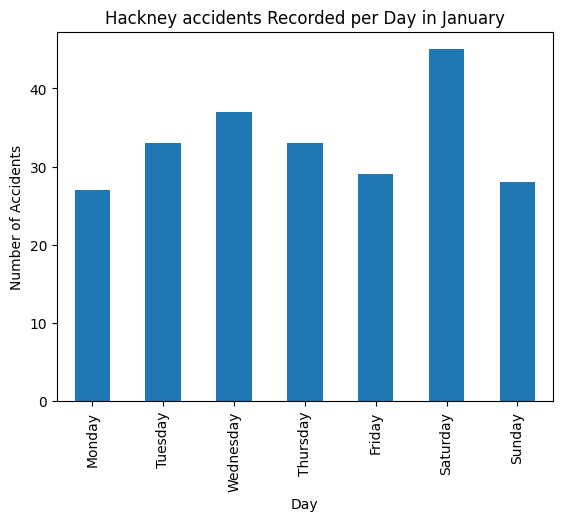

In [95]:
hackney_per_year = Hackney_Ac['Accident Year'].value_counts().sort_index()


#Accident per Year
hackney_per_year.plot(kind='bar')
plt.title('Hackney accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

print()
#----------------------------------------------------------------------------
hackney_2019 = accident[accident['Accident Year'] == 2019]
hackney_ac_2019 = hackney_2019[accident['District Area'] == 'Hackney']

#Accident per Month
hackneyPerMonth = hackney_ac_2019['Accident Month'].value_counts()



month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

hackney_ac_per_month = hackneyPerMonth.reindex(month_order)


hackney_ac_per_month.plot(kind='bar')
plt.title('Hackney accidents per Month in Year 2019')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

print()

#----------------------------------------------------------------------------
hackneyJanuary = accident[accident['Accident Month'] == 'January']
hackney_ac_January = hackneyJanuary[accident['District Area'] == 'Hackney']

hackney_per_day = hackney_ac_January['Accident DayOfWeek'].value_counts().sort_index()
#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

hackney_per_day.index = hackney_per_day.index.map(day_names)
hackney_per_day.plot(kind='bar')
plt.title('Hackney accidents Recorded per Day in January')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

print()


In [96]:
severity_2019_Hackney = hackneyJanuary[hackneyJanuary['Accident Year'] == 2019]

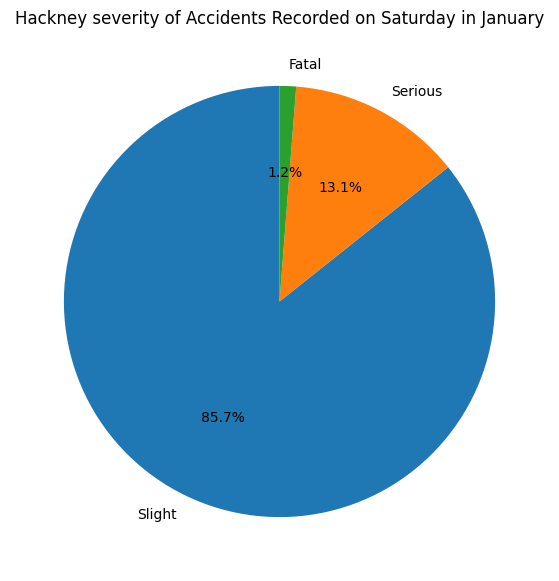

In [98]:
hackneySat = accident[accident['Accident DayOfWeek'] == 5]
hackney_Sat = hackneySat[accident['District Area'] == 'Hackney']

severity_Hackney  = hackneySat['Accident_Severity'].value_counts()

plt.pie(severity_Hackney ,
        labels = severity_Hackney .index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Hackney severity of Accidents Recorded on Saturday in January')
plt.show()


In [151]:
hackney_location = list(zip(hackney_Sat['Latitude'], hackney_Sat['Longitude']))
hackney_map = folium.Map(location=[hackney_Sat['Latitude'].mean(), hackney_Sat['Longitude'].mean()], zoom_start=13)
HeatMap(hackney_location).add_to(hackney_map)
hackney_map

## Insight 💡

<ol start = 27>
    <li>According to the dataset, the year 2019 had the second fewest road accidents in Hackney District.
    <ul>
    <li>The month of January had the fewest road accidents recorded in year 2019 in Hackney District, while September had the highest, followed by June and July.</li>
    <li>In January, Saturday recorded the most accidents, with accident severity of 85.7% slight, 13.1% serious, and 1.2% fatal. The fewest accidents were recorded on Monday..</li>
    <li>Based on the heatmap, road intersections are the most common locations for road accidents.
    </li></ol>



<h1>Moray District Analysis</h1>
<hr>
<br>
<img src='https://www.sykescottages.co.uk/inspiration/wp-content/uploads/Moray-Scotland-.jpg'>

In [110]:
Moray_accident = accident[accident['District Area'] == 'Moray']

,Accident Year
170513,False
170515,False
170525,False
170535,False
170536,False
...,...
506757,False
506758,False
506760,False
506763,False


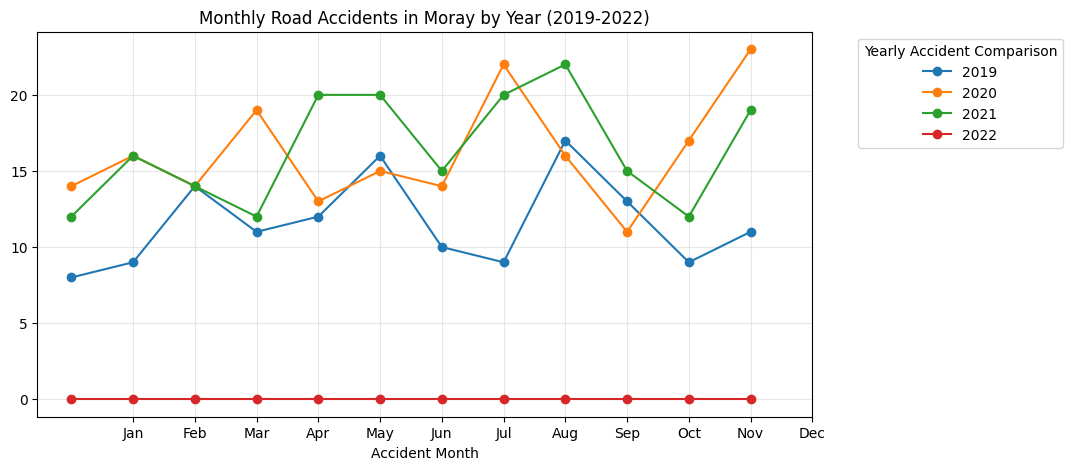

In [104]:
monthly_moray_data = Moray_accident.groupby(['Accident Year', 'Accident Month']).size()

monthly_moray_data = monthly_moray_data.unstack(level=0)

monthly_moray_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Moray by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [116]:
Moray_accident


,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident Year,Accident Month,Accident Day,Accident DayOfWeek
170513,2.01E+12,Slight,2019-01-06,57.647396,Daylight,Moray,-3.320175,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,January,6,6
170515,2.01E+12,Slight,2019-01-10,57.653731,Darkness - no lighting,Moray,-3.455142,1,1,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,2019,January,10,3
170525,2.01E+12,Slight,2019-01-15,57.673878,Darkness - lights lit,Moray,-2.975737,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,January,15,1
170535,2.01E+12,Slight,2019-01-17,57.377828,Darkness - no lighting,Moray,-3.351055,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car,2019,January,17,3
170536,2.01E+12,Slight,2019-01-18,57.636146,Daylight,Moray,-3.304859,1,1,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2019,January,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506757,2.01E+12,Serious,2021-12-31,57.663143,Darkness - lights lit,Moray,-3.111890,2,2,Snow,Single carriageway,Rural,Snowing no high winds,Car,2021,December,31,4
506758,2.01E+12,Slight,2021-12-31,57.668764,Darkness - no lighting,Moray,-3.312736,1,1,Frost or ice,Single carriageway,Rural,Other,Car,2021,December,31,4
506760,2.01E+12,Slight,2021-12-27,57.601891,Daylight,Moray,-3.652719,2,2,Snow,Single carriageway,Rural,Fine no high winds,Car,2021,December,27,0
506763,2.01E+12,Slight,2021-09-09,57.672998,Daylight,Moray,-2.961630,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,September,9,3


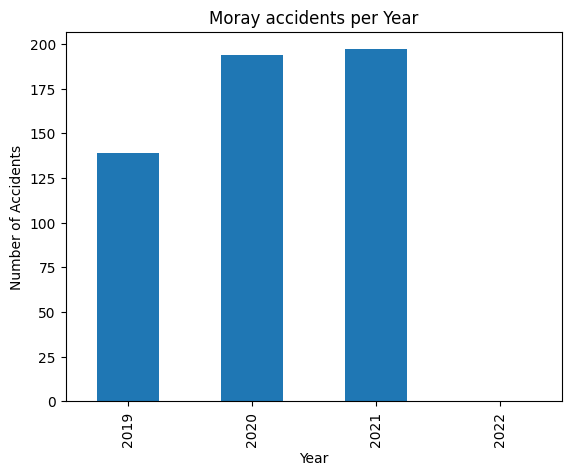

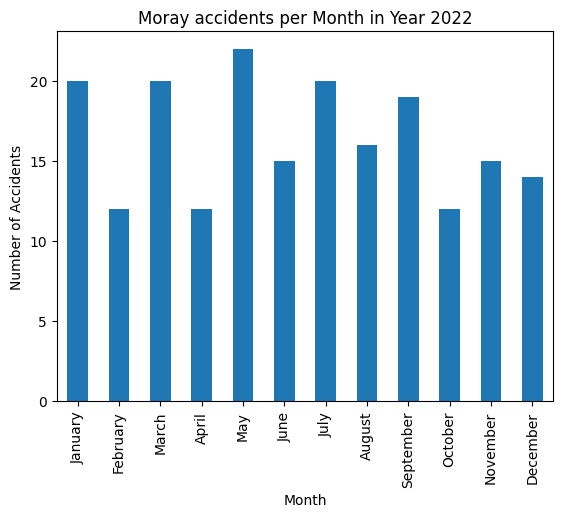

In [119]:
moray_per_year = Moray_accident['Accident Year'].value_counts().sort_index()


#Accident per Year
moray_per_year.plot(kind='bar')
plt.title('Moray accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

print()
#----------------------------------------------------------------------------
moray2021 = accident[accident['Accident Year'] == 2021]
moray_ac2021 = moray2021[accident['District Area'] == 'Moray']

#Accident per Month
morayPerMonth = moray_ac2021['Accident Month'].value_counts()



month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

morayPerMonth = morayPerMonth.reindex(month_order)

morayPerMonth.plot(kind='bar')
plt.title('Moray accidents per Month in Year 2022')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

print()



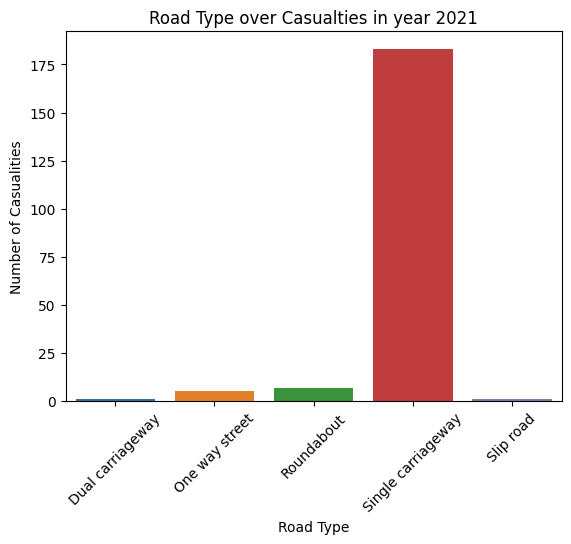

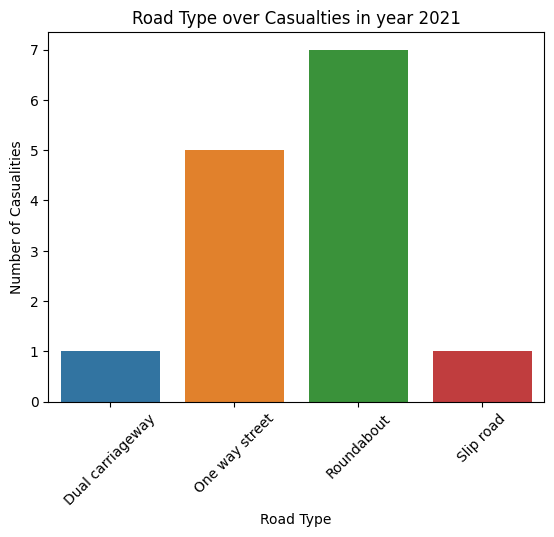

In [125]:
road_type_casualties = moray_ac2021.groupby(['Road_Type'])['Number_of_Casualties'].size().reset_index()
road_type_casualties

sns.barplot(data=road_type_casualties, x='Road_Type', y='Number_of_Casualties', hue='Road_Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Casualities')
plt.title('Road Type over Casualties in year 2021')
plt.xticks(rotation=45)
plt.show()

#-------------------------------------------------------------------------------
nosingle_moray = moray_ac2021[moray_ac2021['Road_Type'] != 'Single carriageway']

road_type_casualties = nosingle_moray.groupby(['Road_Type'])['Number_of_Casualties'].size().reset_index()
road_type_casualties

sns.barplot(data=road_type_casualties, x='Road_Type', y='Number_of_Casualties', hue='Road_Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Casualities')
plt.title('Road Type over Casualties in year 2021')
plt.xticks(rotation=45)
plt.show()

## Insight 💡 == Hindi Pa Tapos ==

<ol start = 28>
    <li>Based on the dataset, In Hounslow District, the <b>year 2022 recorded</b> the highest number of road accidents compared to 2019–2021.
    <ul>
    <li>July had the highest accidents, followed by October, while January and December had the lowest. </li>
    <li>Fridays had the most recorded accidents, making them the riskiest day, while Mondays and Sundays had the fewest.</li>
    <ul><li>Severity of Friday Accidents in July:</li>
    <ul><li>Fatal: 0.2%</li>
    <li>Serious: 11.9%</li>
    <li>Slight: 87.9%</li>
    </li></ol>

<p>In general, Accidents were more frequent in the middle and end of the week, especially towards Fridays, with most cases being slight accidents.</p>



<h1>Liverpool District Analysis</h1>
<hr>
<br>
<img src='https://images.movehub.com/wp-content/uploads/2017/12/14094628/Liverpool-1.jpg'>


In [101]:
liverpool_accident = accident[accident['District Area'] == 'Liverpool']

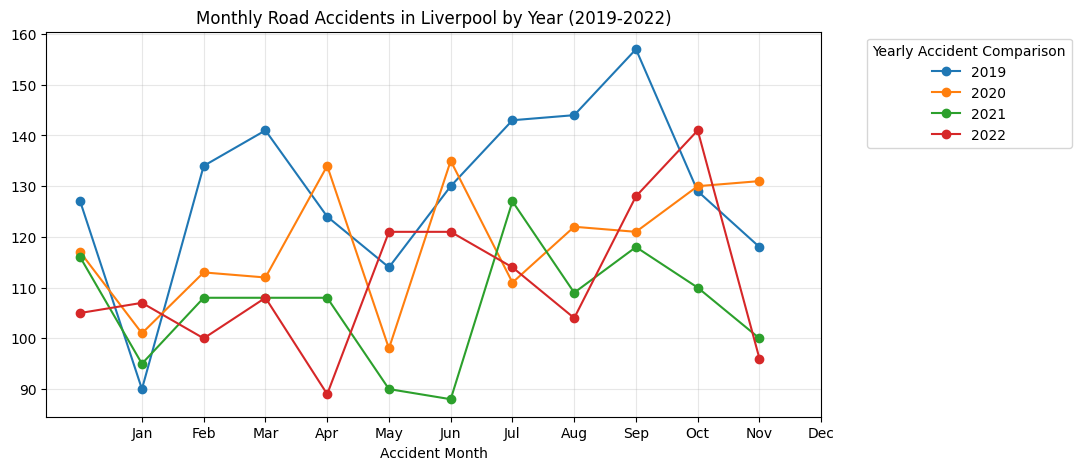

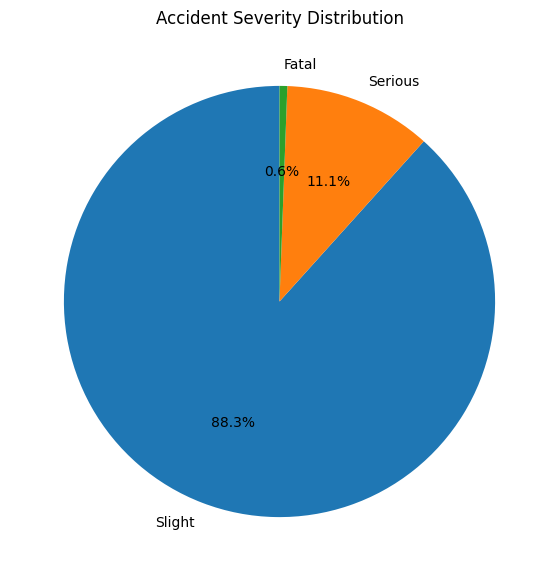

In [144]:
monthly_liverpool_data = liverpool_accident.groupby(['Accident Year', 'Accident Month']).size()

monthly_liverpool_data = monthly_liverpool_data.unstack(level=0)

monthly_liverpool_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Liverpool by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


#--------------------------------------------
#Accident per Month
liverpool_2022 = accident[accident['Accident Year'] == 2022]
liverpool_ac_2022 = hackney_2019[accident['District Area'] == 'Liverpool']


severity_counts = liverpool_ac_2022['Accident_Severity'].value_counts()

plt.pie(severity_counts,
        labels = severity_counts.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [150]:
liverpool_location = list(zip(liverpool_ac_2022['Latitude'], liverpool_ac_2022['Longitude']))
liverpool_map = folium.Map(location=[liverpool_ac_2022['Latitude'].mean(), liverpool_ac_2022['Longitude'].mean()], zoom_start=11)
HeatMap(liverpool_location).add_to(liverpool_map)
liverpool_map

## Insight 💡 == Hindi Pa Tapos ==

<ol start = 29>
    <li>Based on the dataset, In Hounslow District, the <b>year 2022 recorded</b> the highest number of road accidents compared to 2019–2021.
    <ul>
    <li>July had the highest accidents, followed by October, while January and December had the lowest. </li>
    <li>Fridays had the most recorded accidents, making them the riskiest day, while Mondays and Sundays had the fewest.</li>
    <ul><li>Severity of Friday Accidents in July:</li>
    <ul><li>Fatal: 0.2%</li>
    <li>Serious: 11.9%</li>
    <li>Slight: 87.9%</li>
    </li></ol>

<p>In general, Accidents were more frequent in the middle and end of the week, especially towards Fridays, with most cases being slight accidents.</p>



<h1>Kennet District Analysis</h1>
<hr>
<br>
<img src='https://upload.wikimedia.org/wikipedia/commons/3/3e/The_River_Kennet%2C_Reading_-_geograph.org.uk_-_765265.jpg'>


In [102]:
kennet_accident = accident[accident['District Area'] == 'Kennet']

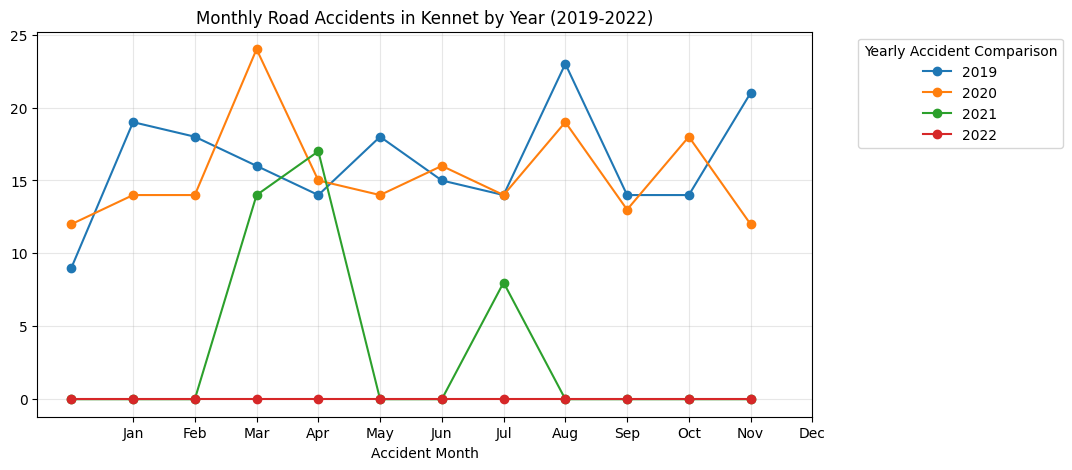

In [152]:
monthly_kennet_data = kennet_accident.groupby(['Accident Year', 'Accident Month']).size()

monthly_kennet_data = monthly_kennet_data.unstack(level=0)

monthly_kennet_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Kennet by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

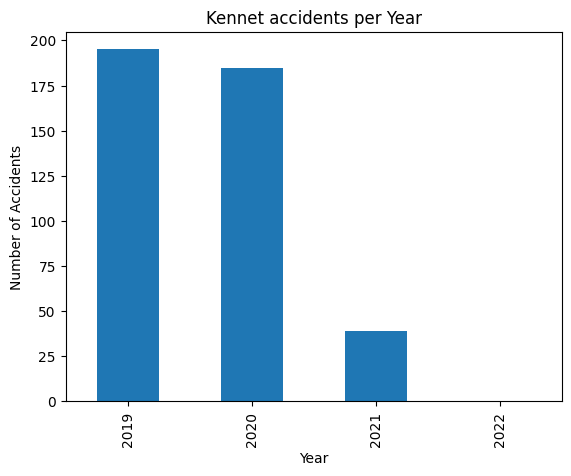

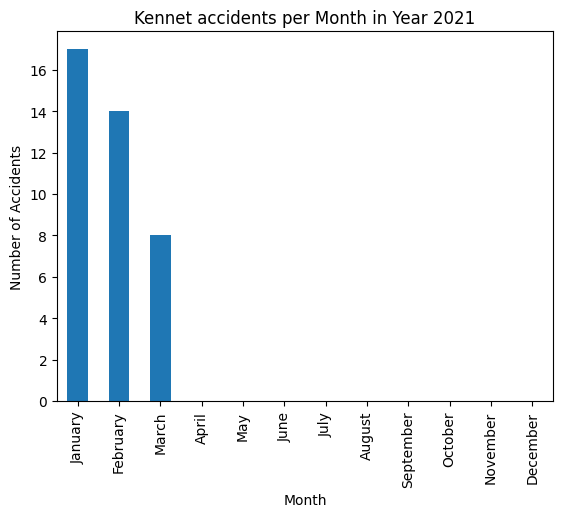

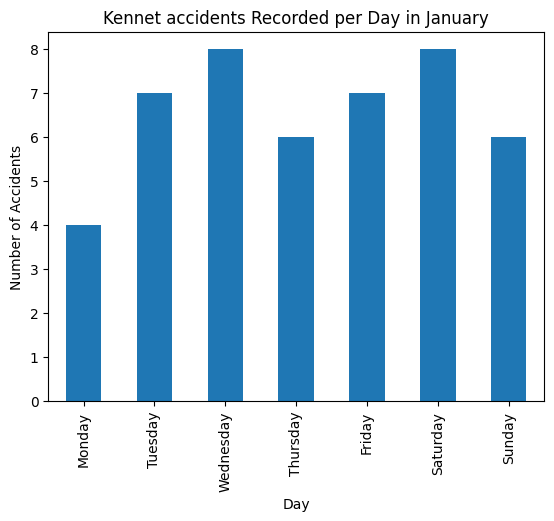

In [163]:
kennet_per_year = kennet_accident['Accident Year'].value_counts().sort_index()


#Accident per Year
kennet_per_year.plot(kind='bar')
plt.title('Kennet accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

print()
#----------------------------------------------------------------------------
kennet2021= kennet_accident[accident['Accident Year'] == 2021]
kennet_ac_2021 = kennet2021[accident['District Area'] == 'Kennet']

#Accident per Month
kennetPerMonth = kennet_ac_2021['Accident Month'].value_counts()



month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

kennet_ac_per_month = kennetPerMonth.reindex(month_order)


kennet_ac_per_month.plot(kind='bar')
plt.title('Kennet accidents per Month in Year 2021')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

print()

#----------------------------------------------------------------------------
kennetJanuary = accident[accident['Accident Month'] == 'January']
kennet_ac_January = kennetJanuary[accident['District Area'] == 'Kennet']

kennet_per_day =kennet_ac_January['Accident DayOfWeek'].value_counts().sort_index()
#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

kennet_per_day.index = kennet_per_day.index.map(day_names)
kennet_per_day.plot(kind='bar')
plt.title('Kennet accidents Recorded per Day in January')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

print()

## Insight 💡 == Hindi Pa Tapos ==

<ol start = 30>
    <li>Based on the dataset, In Hounslow District, the <b>year 2022 recorded</b> the highest number of road accidents compared to 2019–2021.
    <ul>
    <li>July had the highest accidents, followed by October, while January and December had the lowest. </li>
    <li>Fridays had the most recorded accidents, making them the riskiest day, while Mondays and Sundays had the fewest.</li>
    <ul><li>Severity of Friday Accidents in July:</li>
    <ul><li>Fatal: 0.2%</li>
    <li>Serious: 11.9%</li>
    <li>Slight: 87.9%</li>
    </li></ol>

<p>In general, Accidents were more frequent in the middle and end of the week, especially towards Fridays, with most cases being slight accidents.</p>



<h1>Leeds District Analysis</h1>
<hr>
<br>
<img src='https://www.telegraph.co.uk/content/dam/Travel/2018/November/Leeds-town-hall-iStock-625010768.jpg?imwidth=640'>


In [103]:
leeds_accident = accident[accident['District Area'] == 'Leeds']

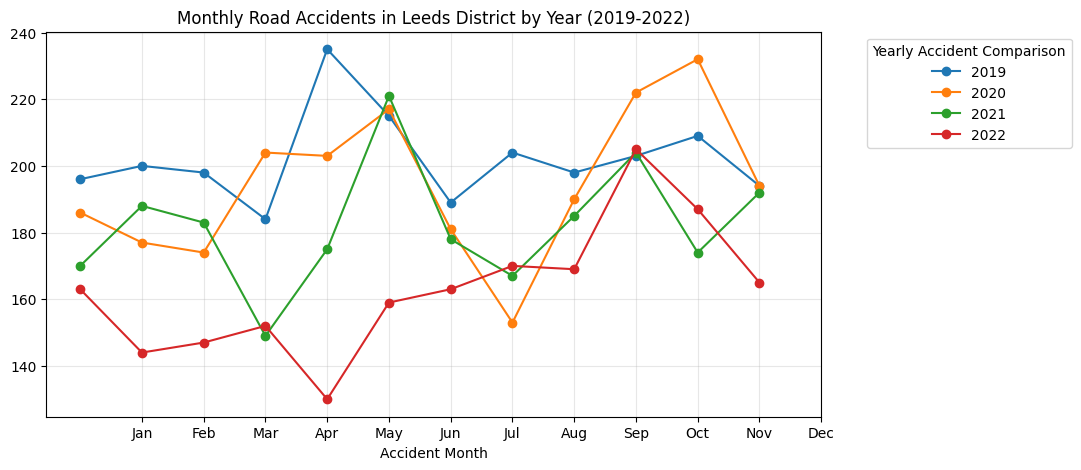

In [165]:
monthly_leeds_data = leeds_accident.groupby(['Accident Year', 'Accident Month']).size()

monthly_leeds_data = monthly_leeds_data.unstack(level=0)

monthly_leeds_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Leeds District by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

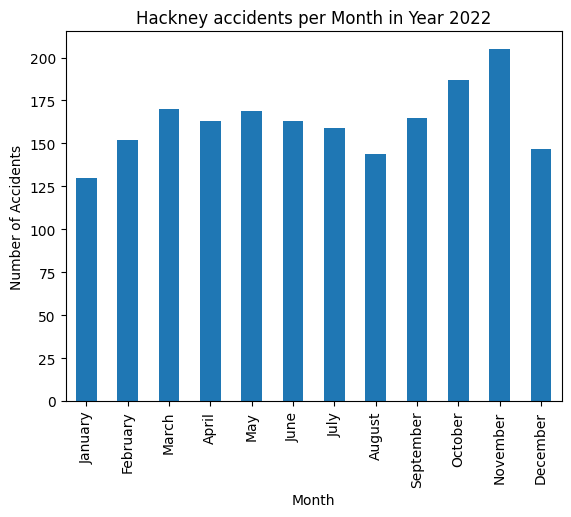

In [167]:
#----------------------------------------------------------------------------
leeds_2022 = leeds_accident[accident['Accident Year'] == 2022]
leeds_ac_2022 = leeds_2022[accident['District Area'] == 'Leeds']


#Accident per Month
leedsPerMonth = leeds_ac_2022['Accident Month'].value_counts()



month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

leeds_ac_per_month = leedsPerMonth.reindex(month_order)


leeds_ac_per_month.plot(kind='bar')
plt.title('Hackney accidents per Month in Year 2022')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

print()


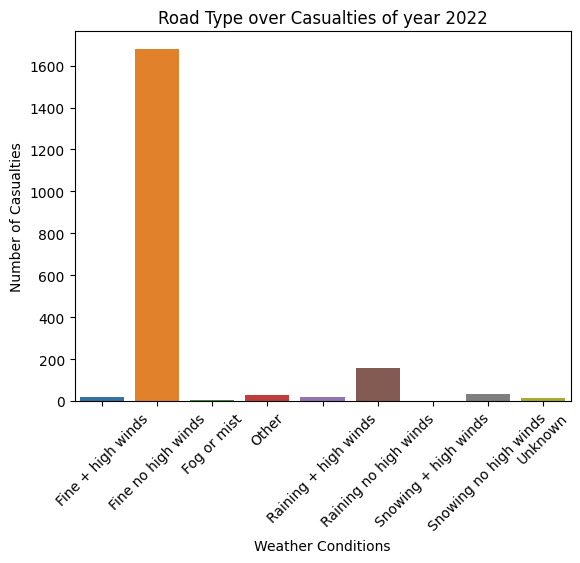

In [182]:
leeds_road_type = leeds_2022
road_type_casualties = leeds_road_type.groupby(['Weather_Conditions'])['Number_of_Casualties'].size().reset_index(name='Count')

sns.barplot(data=road_type_casualties, x='Weather_Conditions', y='Count', hue='Weather_Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Casualties')
plt.title('Road Type over Casualties of year 2022')
plt.xticks(rotation=45)

plt.show()



## Insight 💡 == Hindi Pa Tapos ==

<ol start = 31>
    <li>Based on the dataset, In Hounslow District, the <b>year 2022 recorded</b> the highest number of road accidents compared to 2019–2021.
    <ul>
    <li>July had the highest accidents, followed by October, while January and December had the lowest. </li>
    <li>Fridays had the most recorded accidents, making them the riskiest day, while Mondays and Sundays had the fewest.</li>
    <ul><li>Severity of Friday Accidents in July:</li>
    <ul><li>Fatal: 0.2%</li>
    <li>Serious: 11.9%</li>
    <li>Slight: 87.9%</li>
    </li></ol>

<p>In general, Accidents were more frequent in the middle and end of the week, especially towards Fridays, with most cases being slight accidents.</p>

